In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

In [2]:
ticker  = "TSLA"
startdate = dt.datetime(2016,1,1)
enddate = dt.datetime(2020,12,31)
data = yf.download(ticker,start =startdate,end = enddate)

[*********************100%%**********************]  1 of 1 completed


In [3]:
scaled = MinMaxScaler(feature_range=(0,1))
scaled_data = scaled.fit_transform(data['Close'].values.reshape(-1,1))
len(scaled_data)

1258

In [4]:
days = 50
x_train = []
y_train = []
for x in range(days,len(scaled_data)):
    x_train.append(scaled_data[x-days:x,0])
    y_train.append(scaled_data[x,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))  # input foramt for lstm


In [5]:
print(x_train)

[[[0.02393639]
  [0.02394239]
  [0.0226246 ]
  ...
  [0.01916051]
  [0.02145689]
  [0.02241447]]

 [[0.02394239]
  [0.0226246 ]
  [0.02160699]
  ...
  [0.02145689]
  [0.02241447]
  [0.02349212]]

 [[0.0226246 ]
  [0.02160699]
  [0.02021115]
  ...
  [0.02241447]
  [0.02349212]
  [0.02482792]]

 ...

 [[0.63059796]
  [0.61677469]
  [0.6035067 ]
  ...
  [0.91796069]
  [0.92642573]
  [0.95012499]]

 [[0.61677469]
  [0.6035067 ]
  [0.59016368]
  ...
  [0.92642573]
  [0.95012499]
  [0.95300672]]

 [[0.6035067 ]
  [0.59016368]
  [0.59121433]
  ...
  [0.95012499]
  [0.95300672]
  [0.95645884]]]


Training the LSTM Model

In [6]:
model = Sequential()

model.add(LSTM(units = 50,return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units= 50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs = 25,batch_size = 32)



Epoch 1/25

38/38 [==============================] - 7s 42ms/step - loss: 0.0068
Epoch 2/25
38/38 [==============================] - 2s 43ms/step - loss: 0.0012
Epoch 3/25
38/38 [==============================] - 2s 42ms/step - loss: 0.0016
Epoch 4/25
38/38 [==============================] - 2s 41ms/step - loss: 9.2694e-04
Epoch 5/25
38/38 [==============================] - 2s 42ms/step - loss: 0.0010
Epoch 6/25
38/38 [==============================] - 2s 41ms/step - loss: 8.0509e-04
Epoch 7/25
38/38 [==============================] - 2s 40ms/step - loss: 0.0010
Epoch 8/25
38/38 [==============================] - 2s 42ms/step - loss: 9.2860e-04
Epoch 9/25
38/38 [==============================] - 2s 40ms/step - loss: 7.1314e-04
Epoch 10/25
38/38 [==============================] - 2s 41ms/step - loss: 7.8404e-04
Epoch 11/25
38/38 [==============================] - 2s 40ms/step - loss: 8.6823e-04
Epoch 12/25
38/38 [==============================] - 2s 40ms/step - loss: 6.5908e-04
Epoch 

In [7]:
teststart = dt.datetime(2021,1,1)
testend = dt.datetime.now()
test_data = yf.download(ticker,start = teststart,end = testend)
actual_prices = test_data['Close'].values



[*********************100%%**********************]  1 of 1 completed


In [8]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)
print(total_dataset)

Date
2016-01-04     14.894000
2016-01-05     14.895333
2016-01-06     14.602667
2016-01-07     14.376667
2016-01-08     14.066667
                 ...    
2024-02-23    191.970001
2024-02-26    199.399994
2024-02-27    199.729996
2024-02-28    202.039993
2024-02-29    203.410095
Name: Close, Length: 2052, dtype: float64


In [9]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaled.transform(model_inputs)

In [10]:
x_test =[]
for x in range(days,len(model_inputs)):
     x_test.append(model_inputs[x-days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_prices = model.predict(x_test)
predicted_prices = scaled.inverse_transform(predicted_prices)
     

25/25 [==============================] - 1s 15ms/step


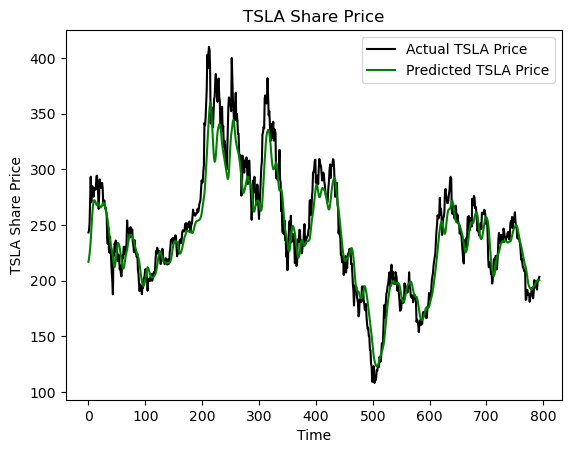

In [11]:
plt.plot(actual_prices, color='black', label=f"Actual {ticker} Price")
plt.plot(predicted_prices, color='green', label=f"Predicted {ticker} Price")
plt.title(f"{ticker} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{ticker} Share Price')
plt.legend()
plt.show()

Stock Price Prediction

In [15]:
# generated a real-time prediction using the last 60 days of data. 
# I inversely scaled the predicted value back to the original scale and printed out the result

real_data = [model_inputs[len(model_inputs) + 1 - days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
prediction = model.predict(real_data)
prediction = scaled.inverse_transform(prediction)

print(f"Prediction: {prediction}")

1/1 [==============================] - 0s 37ms/step
Prediction: [[201.01624]]
